## Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
bundesliga_23_24_player = pd.read_csv('../Dataset/Bundesliga_2023-2024_player_data.csv')
bundesliga_22_23_player = pd.read_csv('../Dataset/Bundesliga_2022-2023_player_data.csv')
bundesliga_21_22_player = pd.read_csv('../Dataset/Bundesliga_2021-2022_player_data.csv')

In [3]:
print("shape of 2023/2024 data" , bundesliga_23_24_player.shape)
print("shape of 2022/2023 data" , bundesliga_22_23_player.shape)
print("shape of 2021/2022 data" , bundesliga_21_22_player.shape)

shape of 2023/2024 data (1988, 54)
shape of 2022/2023 data (9481, 54)
shape of 2021/2022 data (9368, 54)


In [4]:
bundesliga_23_24_player.head()

,index,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,...,Att_y.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist,home,game_id
0,0,Marvin Ducksch,7.0,de GER,FW,29-164,90,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,1,Niclas Füllkrug,11.0,de GER,FW,30-190,90,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,2,Anthony Jung,3.0,de GER,LW,31-288,78,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,3,Leon Opitz,35.0,de GER,LW,18-129,12,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,4,Mitchell Weiser,8.0,de GER,RW,29-119,58,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [5]:
bundesliga_22_23_player.head()

,index,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,...,Att_y.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist,home,game_id
0,0,Rafael Borré,19.0,co COL,FW,26-324,45,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,1,Randal Kolo Muani,9.0,fr FRA,FW,23-243,45,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,2,Mario Götze,27.0,de GER,"RM,AM",30-063,90,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,3,Jesper Lindstrøm,29.0,dk DEN,AM,22-157,45,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,4,Christopher Lenz,25.0,de GER,LB,27-317,45,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [6]:
bundesliga_21_22_player.head()

,index,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,...,Att_y.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist,home,game_id
0,0,Alassane Pléa,14.0,fr FRA,FW,28-156,63,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,1,Marcus Thuram,10.0,fr FRA,FW,24-007,27,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,2,Hannes Wolf,11.0,at AUT,LW,22-119,71,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,3,Keanan Bennetts,37.0,eng ENG,LW,22-157,19,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,4,Patrick Herrmann,7.0,de GER,RW,30-182,63,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


The index column in each dataframe is of no use since the dataframe itself has an index so we will drop it from each dataframe

In [7]:
bundesliga_23_24_player.drop(columns = ['index'] , inplace = True)
bundesliga_22_23_player.drop(columns = ['index'] , inplace = True)
bundesliga_21_22_player.drop(columns = ['index'] , inplace = True)

## Feature Engineering

## Season

Adding a feature to each table to indicate the season at which the game was played

In [8]:
bundesliga_23_24_player['season'] = '2023-2024'
bundesliga_22_23_player['season'] = '2022-2023'
bundesliga_21_22_player['season'] = '2021-2022'

## Team

Adding a feature to indicate the team each player plays for. We will make use of teams data to add this feature

In [9]:
bundesliga_23_24 = pd.read_csv('../Dataset/Bundesliga_2023-2024.csv')
bundesliga_22_23 = pd.read_csv('../Dataset/Bundesliga_2022-2023.csv')
bundesliga_21_22 = pd.read_csv('../Dataset/Bundesliga_2021-2022.csv')

teams and players dataframes have a common column called `game_id`, we will use that column to merge players and teams dataframes for each season

In [10]:
player_team_df_23_24 = bundesliga_23_24_player.merge(bundesliga_23_24 , on = 'game_id' , how = 'inner')
player_team_df_22_23 = bundesliga_22_23_player.merge(bundesliga_22_23 , on = 'game_id' , how = 'inner')
player_team_df_21_22 = bundesliga_21_22_player.merge(bundesliga_21_22 , on = 'game_id' , how = 'inner')

selecting player's name and whether his team played at home from player data and selecting the home and away team names from teams data. we want this information just one time for each player to know the name of the team so we will drop duplicate rows

In [11]:
player_team_df_23_24 = player_team_df_23_24[['Player', 'home' , 'Home' , 'Away']].drop_duplicates(subset = 'Player')
player_team_df_22_23 = player_team_df_22_23[['Player', 'home' , 'Home' , 'Away']].drop_duplicates(subset = 'Player')
player_team_df_21_22 = player_team_df_21_22[['Player', 'home' , 'Home' , 'Away']].drop_duplicates(subset = 'Player')

Getting each player's team name

In [12]:
def get_player_team(row):
    return row['Home'] if row['home'] == 1 else row['Away']

player_team_df_23_24['Team'] = player_team_df_23_24.apply(get_player_team , axis = 1).values
player_team_df_22_23['Team'] = player_team_df_22_23.apply(get_player_team , axis = 1).values
player_team_df_21_22['Team'] = player_team_df_21_22.apply(get_player_team , axis = 1).values

Adding the team name to players dataframes, the function `add_team_col` takes as input the players dataframe for a given season along with the joined dataframe of players and teams data for the same season, then it creates a new column for the team name and loops through each row in players dataframe taking the player's name and using it to get the team name from the joined players and teams dataframe

In [13]:
def add_team_col(player , player_team):
    player['Team'] = np.nan
    for index , row in player.iterrows():
        player.at[index , 'Team'] = (player_team.loc[player_team['Player'] == row['Player'] , 'Team'].values[0])

In [14]:
add_team_col(bundesliga_23_24_player , player_team_df_23_24)
add_team_col(bundesliga_22_23_player , player_team_df_22_23)
add_team_col(bundesliga_21_22_player , player_team_df_21_22)

In [15]:
bundesliga_23_24_player.head()

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist,home,game_id,season,Team
0,Marvin Ducksch,7.0,de GER,FW,29-164,90,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,2023-2024,Werder Bremen
1,Niclas Füllkrug,11.0,de GER,FW,30-190,90,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,2023-2024,Werder Bremen
2,Anthony Jung,3.0,de GER,LW,31-288,78,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,2023-2024,Werder Bremen
3,Leon Opitz,35.0,de GER,LW,18-129,12,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,2023-2024,Werder Bremen
4,Mitchell Weiser,8.0,de GER,RW,29-119,58,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,2023-2024,Werder Bremen


Merging the 3 seasons data into one dataframe

In [16]:
player_df = pd.concat([bundesliga_23_24_player , bundesliga_22_23_player , bundesliga_21_22_player],ignore_index = True)
player_df.head()

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist,home,game_id,season,Team
0,Marvin Ducksch,7.0,de GER,FW,29-164,90,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,2023-2024,Werder Bremen
1,Niclas Füllkrug,11.0,de GER,FW,30-190,90,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,2023-2024,Werder Bremen
2,Anthony Jung,3.0,de GER,LW,31-288,78,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,2023-2024,Werder Bremen
3,Leon Opitz,35.0,de GER,LW,18-129,12,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,2023-2024,Werder Bremen
4,Mitchell Weiser,8.0,de GER,RW,29-119,58,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,2023-2024,Werder Bremen


# Data Cleaning

In [17]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 55 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     20837 non-null  object 
 1   #          20836 non-null  float64
 2   Nation     20836 non-null  object 
 3   Pos        20836 non-null  object 
 4   Age        20780 non-null  object 
 5   Min        20837 non-null  int64  
 6   Gls        20837 non-null  float64
 7   Ast        20837 non-null  float64
 8   PK         20837 non-null  float64
 9   PKatt      20837 non-null  float64
 10  Sh         20837 non-null  float64
 11  SoT        20837 non-null  float64
 12  CrdY       20837 non-null  float64
 13  CrdR       20837 non-null  float64
 14  Touches    20781 non-null  float64
 15  Tkl        20781 non-null  float64
 16  Int        20837 non-null  float64
 17  Blocks     20781 non-null  float64
 18  xG         20781 non-null  float64
 19  npxG       20781 non-null  float64
 20  xAG   

## Handling missing values

The columns `SoTA`, `GA`, `Saves`, `Save%`, `PSxG`, `Cmp_y`, `Att_y`, `Cmp%_y`, `Att_y.1`, `Thr`, `Launch%`, `AvgLen`, `Att_y.2`, `Launch%.1`, `AvgLen.1`, `Opp`, `Stp`, `Stp%`, `#OPA`, `AvgDist` have extremely high null values count so we will drop them

In [18]:
player_df.drop(columns = ['SoTA', 'GA', 'Saves', 'Save%',
       'PSxG', 'Cmp_y', 'Att_y', 'Cmp%_y', 'Att_y.1', 'Thr', 'Launch%',
       'AvgLen', 'Att_y.2', 'Launch%.1', 'AvgLen.1', 'Opp', 'Stp', 'Stp%',
       '#OPA', 'AvgDist'], axis = 1 , inplace = True)

In [19]:
player_df.isna().sum()

Player       0
#            1
Nation       1
Pos          1
Age         57
Min          0
Gls          0
Ast          0
PK           0
PKatt        0
Sh           0
SoT          0
CrdY         0
CrdR         0
Touches     56
Tkl         56
Int          0
Blocks      56
xG          56
npxG        56
xAG         56
SCA         56
GCA         56
Cmp_x       56
Att_x       56
Cmp%_x     311
PrgP        56
Carries     56
PrgC        56
Att_x.1     56
Succ        56
home         0
game_id      0
season       0
Team         0
dtype: int64

In [20]:
player_df[player_df['#'].isna()]

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Cmp%_x,PrgP,Carries,PrgC,Att_x.1,Succ,home,game_id,season,Team
2204,16 Players,NaN,NaN,NaN,NaN,989,0.0,0.0,0.0,0.0,...,78.0,32.0,317.0,16.0,33.0,13.0,0,6,2022-2023,Leverkusen


We will drop this row since it doesn't include any useful information

In [21]:
player_df.drop(player_df[player_df['#'].isna()].index , inplace = True)

The columns Age, Touches, Tkl, Blocks,xG, npxG, xAG, SCA, GCA, Cmp_x, Att_x all have the same number of missing values so we will inspect them to see if there's some pattern for this data loss

In [22]:
player_df[(player_df['Age'].isna()) & (player_df['Touches'].isna()) & (player_df['Tkl'].isna()) & 
          (player_df['Blocks'].isna()) & (player_df['xG'].isna()) & (player_df['npxG'].isna()) & 
          (player_df['xAG'].isna()) & (player_df['SCA'].isna()) & (player_df['GCA'].isna()) & 
          (player_df['Cmp_x'].isna()) & (player_df['Att_x'].isna()) ]

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Cmp%_x,PrgP,Carries,PrgC,Att_x.1,Succ,home,game_id,season,Team
2023,Omar Marmoush,33.0,eg EGY,AM,NaN,66,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2022-2023,Wolfsburg
2532,Omar Marmoush,33.0,eg EGY,LM,NaN,67,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,17,2022-2023,Wolfsburg
2704,Omar Marmoush,33.0,eg EGY,AM,NaN,58,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,23,2022-2023,Wolfsburg
2942,Omar Marmoush,33.0,eg EGY,FW,NaN,45,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,30,2022-2023,Wolfsburg
3277,Omar Marmoush,33.0,eg EGY,FW,NaN,45,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,41,2022-2023,Wolfsburg
3466,Omar Marmoush,33.0,eg EGY,FW,NaN,12,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,47,2022-2023,Wolfsburg
3868,Omar Marmoush,33.0,eg EGY,FW,NaN,31,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,60,2022-2023,Wolfsburg
4070,Omar Marmoush,33.0,eg EGY,FW,NaN,89,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,67,2022-2023,Wolfsburg
4329,Omar Marmoush,33.0,eg EGY,FW,NaN,74,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,75,2022-2023,Wolfsburg
4531,Omar Marmoush,33.0,eg EGY,FW,NaN,32,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,82,2022-2023,Wolfsburg


All the missing values for these columns correspond to the same player so we will remove all rows associated with that player

In [23]:
player_df.drop(player_df[player_df['Player'] == "Omar Marmoush"].index, inplace=True)

Checking the null values for the column `Cmp%_x` and see if that has anything to do with related features such as `Att_x` , `Cmp_x`

In [24]:
player_df.loc[player_df['Cmp%_x'].isna() , ["Cmp_x" , "Att_x" , 'Cmp%_x']]

,Cmp_x,Att_x,Cmp%_x
88,0.0,0.0,NaN
255,0.0,0.0,NaN
455,0.0,0.0,NaN
508,0.0,0.0,NaN
711,0.0,0.0,NaN
...,...,...,...
20680,0.0,0.0,NaN
20734,0.0,0.0,NaN
20744,0.0,0.0,NaN
20808,0.0,0.0,NaN


It looks like `Cmp%_x` is null when `Att_x` is zero which makes sense becaue when attempted passes are zero completed passes are of course zero so when trying to compute completed passes percentage we will be dividing zero by zero which is undefined

## Converting Age to numeric values

In [25]:
player_df['Age'].value_counts()

Age
27-284    13
25-135    12
23-031    12
27-333    12
24-128    12
          ..
29-241     1
35-136     1
35-068     1
17-318     1
19-133     1
Name: count, Length: 5897, dtype: int64

In [26]:
player_df['Age'] = pd.to_numeric(player_df['Age'].str.split("-" , expand = True)[0] , errors = "coerce")
player_df['Age'].value_counts()

Age
24    2075
25    1910
26    1906
23    1754
27    1640
28    1522
29    1402
22    1309
30    1273
21    1110
31    1099
20     844
32     757
33     553
19     513
34     435
18     271
35     164
17      84
36      80
37      28
16      17
39      16
38      11
Name: count, dtype: int64

In [27]:
player_df['Age'].isna().sum()

0

## Handling muliple values in the position column

for some rows the position column has multiple values for matches in which the player played in more than positions. 

In [28]:
player_df['Pos'].value_counts()

Pos
CB          3663
FW          2919
CM          2559
AM          1432
GK          1355
            ... 
CM,AM,LW       1
CM,LW,DM       1
LW,FW,RW       1
FW,AM,LW       1
RB,LW          1
Name: count, Length: 237, dtype: int64

We will handle that case by replacing the columns with multiple values with thme most common position, and if the most common position itself was multiple positions we will take the first one

In [29]:
# getting the most common position for each player 
# if the most common position has multiple values we take the first one
most_common_pos =  player_df.groupby('Player')['Pos'].apply(lambda x: x.mode().iloc[0]).str.split("," , expand = True)[0]
player_df['Pos'] = player_df.apply(lambda row: most_common_pos[row['Player']] , axis = 1).values

# Data Analysis

## Age

### Age Distribution

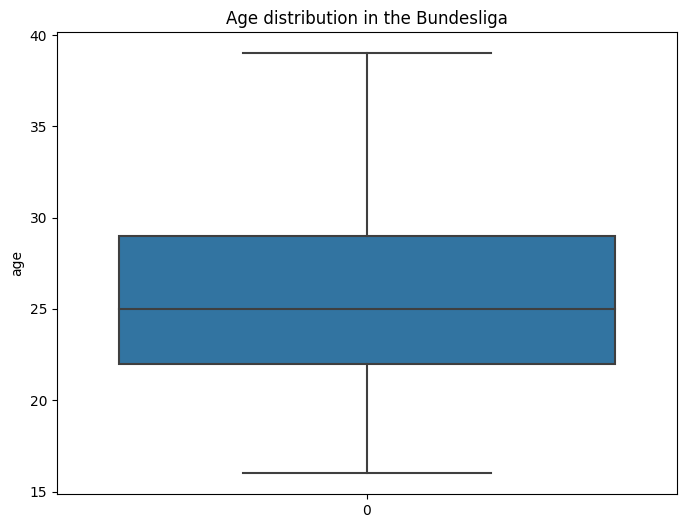

In [30]:
latest_age_per_player = player_df.groupby('Player')['Age'].max()
plt.figure(figsize = (8,6))
sns.boxplot(latest_age_per_player)
plt.title("Age distribution in the Bundesliga")
plt.ylabel("age")
plt.show()

Most of the player are between 20 and 30 which is normal for football player but we have some younger players below 20 and some older players in their late 30s. Let's figure out the youngest and oldest players in the Bundesliga for this period

In [31]:
# youngest 5 players
latest_age_per_player.sort_values().head(5)

Player
Zidan Sertdemir       16
Iker Bravo            16
Sidney Raebiger       16
Lauren Ulrich         17
Arijon Ibrahimović    17
Name: Age, dtype: int64

In [32]:
latest_age_per_player.sort_values(ascending = False).head(5)

Player
Makoto Hasebe          39
Anthony Losilla        37
Philipp Tschauner      36
Manuel Neuer           36
Christopher Trimmel    36
Name: Age, dtype: int64

## Minutes Played

In [33]:
mins_df = player_df.groupby('Player').agg({'Min': 'mean' , 'Pos': 'first'})

### Players with highest average minutes played and their positions

In [34]:
mins_df.sort_values(by = 'Min',ascending = False).head(50)

,Min,Pos
Player,,
Ørjan Nyland,90.0,GK
Stefan Ortega,90.0,GK
Mark Flekken,90.0,GK
Marius Funk,90.0,GK
Marcel Schuhen,90.0,GK
Benjamin Uphoff,90.0,GK
Manuel Riemann,90.0,GK
Jan Olschowsky,90.0,GK
Malick Thiaw,90.0,CB


Most of the players with highes average minutes played are goalkeepers which makes sense because goalkeepers rarely get benched, 
we can inspect this more by looking at the average minutes played for each positions

In [35]:
mins_per_pos = player_df.groupby('Pos')['Min'].mean().reset_index()
mins_per_pos

,Pos,Min
0,AM,53.552984
1,CB,76.027425
2,CM,62.350101
3,DM,63.957129
4,FW,52.366852
5,GK,89.534317
6,LB,68.713274
7,LM,49.945783
8,LW,55.433198
9,RB,63.443862


Visualizing the result

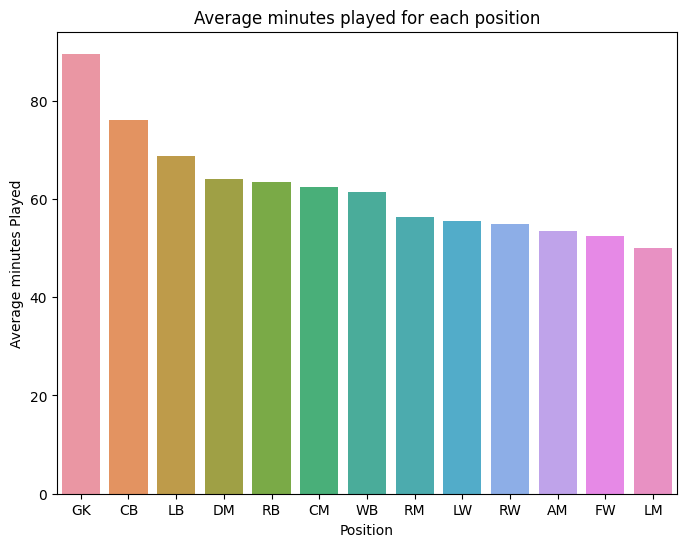

In [36]:
plt.figure(figsize = (8,6))
sns.barplot(mins_per_pos.sort_values(by = 'Min' , ascending = False) , x = 'Pos' , y = 'Min')
plt.title('Average minutes played for each position')
plt.xlabel('Position')
plt.ylabel('Average minutes Played')
plt.show()

### Average minutes played vs age 

In [37]:
mins_age_df = player_df.groupby('Player').agg({'Min': 'mean' , 'Age': 'first'})

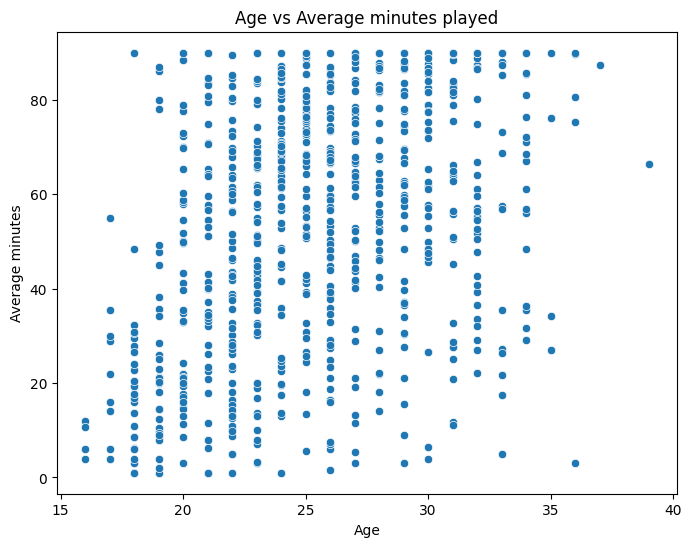

In [38]:
plt.figure(figsize = (8 , 6))
sns.scatterplot(mins_age_df , x = 'Age' , y = 'Min')
plt.title("Age vs Average minutes played")
plt.xlabel("Age")
plt.ylabel("Average minutes")
plt.show()

The graph doesn't show a specific pattern about the relation between player's age and average playing minutes, we can verify this by calculating the correlation

In [39]:
player_df['Age'].corr(player_df['Min'])

0.14547996983110292

## Goals and Assists

Frequency of goals scored by a given player every match

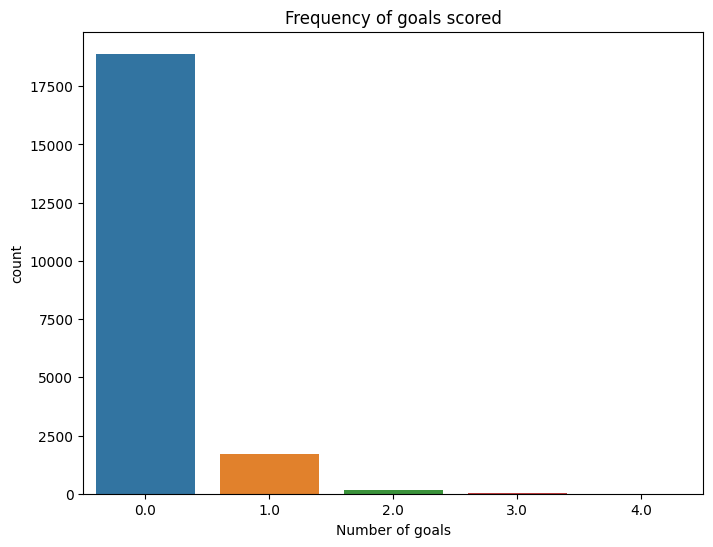

In [40]:
plt.figure(figsize = (8,6))
sns.countplot(data = player_df , x = 'Gls')
plt.title("Frequency of goals scored")
plt.xlabel("Number of goals")
plt.ylabel("count")
plt.show()

### Top scorers 

#### Top scorers for 2021-2022 season

In [41]:
player_df[player_df['season'] == '2021-2022'].groupby('Player').agg({'Pos': 'first','Team': 'first','Age':'first','Gls': 'sum' 
                                                                     , 'xG': 'sum' , 'npxG': 'sum'}).reset_index().sort_values(by = 'Gls' , 
                                                                    ascending = False).head(10)

,Player,Pos,Team,Age,Gls,xG,npxG
415,Robert Lewandowski,FW,Bayern Munich,32,35.0,33.3,29.6
383,Patrik Schick,FW,Leverkusen,25,24.0,18.1,16.6
121,Erling Haaland,FW,Dortmund,21,22.0,18.1,13.4
70,Christopher Nkunku,FW,RB Leipzig,23,20.0,16.1,15.3
32,Anthony Modeste,FW,Köln,33,20.0,18.0,17.2
464,Taiwo Awoniyi,FW,Union Berlin,24,15.0,13.4,11.8
441,Serge Gnabry,RW,Bayern Munich,26,14.0,8.3,8.3
346,Moussa Diaby,RW,Leverkusen,22,13.0,8.1,7.3
327,Max Kruse,FW,Union Berlin,33,12.0,10.8,7.0
200,Jonas Hofmann,AM,M'Gladbach,29,12.0,7.9,7.9


#### Top scorers for 2022-2023 season

In [42]:
player_df[player_df['season'] == '2022-2023'].groupby('Player').agg({'Pos': 'first','Team': 'first','Age':'first','Gls': 'sum' , 'xG': 'sum' 
    , 'npxG': 'sum' , }).reset_index().sort_values(by = 'Gls' , ascending = False).head(10)

,Player,Pos,Team,Age,Gls,xG,npxG
61,Christopher Nkunku,FW,RB Leipzig,24,16.0,14.3,11.2
349,Niclas Füllkrug,FW,Werder Bremen,29,16.0,12.7,8.7
402,Randal Kolo Muani,FW,Eint Frankfurt,23,15.0,13.1,11.6
490,Vincenzo Grifo,LW,Freiburg,29,15.0,10.4,3.9
436,Serge Gnabry,RW,Bayern Munich,27,14.0,11.4,10.6
298,Marcus Thuram,FW,M'Gladbach,25,13.0,16.4,16.4
305,Marvin Ducksch,FW,Werder Bremen,28,12.0,11.3,10.5
164,Jamal Musiala,AM,Bayern Munich,19,12.0,7.7,7.7
186,Jonas Hofmann,AM,M'Gladbach,30,12.0,7.3,6.7
19,Andrej Kramarić,FW,Hoffenheim,31,12.0,13.0,8.3


The number of goals for the top scorers decreased a lot in 2022-2023, for example Christopher Nkunku scored 20 goals in 2021-2022 season and came 4th but he needed only 16 to become the top scorer of 2022-2023 season 

#### Top scorers for 2023-2024 season so far

In [43]:
player_df[player_df['season'] == '2023-2024'].groupby('Player').agg({'Pos': 'first','Team': 'first','Age':'first','Gls': 'sum' , 'xG': 'sum' 
    , 'npxG': 'sum' , 'Team': 'first'}).reset_index().sort_values(
    by = 'Gls' , ascending = False).head(10)

,Player,Pos,Team,Age,Gls,xG,npxG
350,Serhou Guirassy,FW,Stuttgart,27,13.0,7.3,6.5
122,Harry Kane,FW,Bayern Munich,30,8.0,6.7,4.3
154,Jonas Wind,FW,Wolfsburg,24,7.0,4.8,3.9
379,Victor Boniface,FW,Leverkusen,22,7.0,8.0,7.2
203,Leroy Sané,RW,Bayern Munich,27,6.0,4.6,4.6
254,Maximilian Beier,FW,Hoffenheim,20,5.0,2.6,2.6
89,Ermedin Demirović,FW,Augsburg,25,4.0,3.5,3.5
175,Kevin Behrens,FW,Union Berlin,32,4.0,3.9,3.9
207,Loïs Openda,FW,RB Leipzig,23,4.0,2.6,2.6
14,Andrej Kramarić,FW,Hoffenheim,32,4.0,3.3,0.9


After few rounds of 2023-2024 season, Serhou Guirassy is already 3 goals away from the previous season's top scorer and he scored 13 goals from 7.3 expected goals which is really impressive. 

#### shot success rate

Measuring the ratio between goals scored and shots attempted

In [44]:
sh_df = player_df.groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','Gls': 'sum' , 'Sh': 'sum'}).reset_index()
sh_df['success rate'] = np.where(sh_df['Sh'] > 0, sh_df['Gls'] / sh_df['Sh'], np.nan)
sh_df.sort_values(by = ['Gls','success rate'] , ascending = False).head(10)

,Player,Pos,Team,Age,Gls,Sh,success rate
112,Christopher Nkunku,FW,RB Leipzig,24,36.0,151.0,0.238411
661,Robert Lewandowski,FW,Bayern Munich,32,35.0,156.0,0.224359
314,Jonas Hofmann,AM,Leverkusen,31,28.0,116.0,0.241379
701,Serge Gnabry,RW,Bayern Munich,28,28.0,159.0,0.176101
618,Patrik Schick,FW,Leverkusen,26,27.0,122.0,0.221311
784,Vincenzo Grifo,LW,Freiburg,30,25.0,130.0,0.192308
703,Serhou Guirassy,FW,Stuttgart,27,24.0,77.0,0.311688
189,Erling Haaland,FW,Dortmund,21,22.0,74.0,0.297297
51,Anthony Modeste,FW,Dortmund,34,22.0,129.0,0.170543
550,Moussa Diaby,RW,Leverkusen,23,22.0,132.0,0.166667


### Top Assisters

#### Top assisters 2021-2022 season

In [45]:
player_df[player_df['season'] == '2021-2022'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','Ast': 'sum','xAG':'sum' , 
    'Team': 'first'}).reset_index().sort_values(by = 'Ast' , ascending = False).head(10)

,Player,Pos,Team,Age,Ast,xAG
471,Thomas Müller,AM,Bayern Munich,31,18.0,12.7
70,Christopher Nkunku,FW,RB Leipzig,23,13.0,9.6
303,Marco Reus,AM,Dortmund,32,13.0,8.0
346,Moussa Diaby,RW,Leverkusen,22,12.0,9.2
90,David Raum,LB,Hoffenheim,23,11.0,11.4
139,Florian Wirtz,AM,Leverkusen,18,10.0,7.8
65,Christian Günter,LB,Freiburg,28,9.0,7.0
22,Andrej Kramarić,FW,Hoffenheim,30,9.0,8.0
130,Filip Kostić,WB,Eint Frankfurt,28,9.0,9.2
210,Joshua Kimmich,DM,Bayern Munich,26,9.0,8.8


#### Top assisters 2022-2023 season

In [46]:
player_df[player_df['season'] == '2022-2023'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','Ast': 'sum','xAG':'sum' , 
    'Team': 'first'}).reset_index().sort_values(
    by = 'Ast' , ascending = False).head(10)

,Player,Pos,Team,Age,Ast,xAG
405,Raphaël Guerreiro,LB,Dortmund,28,12.0,7.5
402,Randal Kolo Muani,FW,Eint Frankfurt,23,11.0,6.6
164,Jamal Musiala,AM,Bayern Munich,19,10.0,6.6
132,Florian Kainz,LW,Köln,29,10.0,8.7
5,Alassane Pléa,FW,M'Gladbach,29,9.0,4.0
186,Jonas Hofmann,AM,M'Gladbach,30,9.0,10.9
334,Mitchell Weiser,WB,Werder Bremen,28,9.0,5.6
24,Angeliño,WB,Hoffenheim,25,8.0,7.2
208,Julian Brandt,AM,Dortmund,26,8.0,9.1
381,Patrick Wimmer,RW,Wolfsburg,21,8.0,4.9


#### Top assisters 2023-2024 so far

In [47]:
player_df[player_df['season'] == '2023-2024'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','Ast': 'sum','xAG':'sum' , 
    'Team': 'first'}).reset_index().sort_values(by = 'Ast' , ascending = False).head(10)

,Player,Pos,Team,Age,Ast,xAG
44,Chris Führich,LW,Stuttgart,25,5.0,3.1
122,Harry Kane,FW,Bayern Munich,30,4.0,2.9
161,Julian Brandt,AM,Dortmund,27,4.0,3.0
387,Xavi Simons,AM,RB Leipzig,20,4.0,0.8
393,Álex Grimaldo,WB,Leverkusen,27,3.0,1.1
380,Vincenzo Grifo,LW,Freiburg,30,3.0,1.5
152,Jonas Hofmann,AM,Leverkusen,31,3.0,3.0
136,Jan-Niklas Beste,LW,Heidenheim,24,3.0,1.6
157,Joshua Kimmich,DM,Bayern Munich,28,3.0,1.8
120,Grischa Prömel,CM,Hoffenheim,28,3.0,1.0


## Shot-creating actions

#### 2021-2022 season

In [48]:
player_df[player_df['season'] == '2021-2022'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','SCA': 'sum','Team': 'first'}).reset_index().sort_values(
    by = 'SCA' , ascending = False).head(10)

,Player,Pos,Team,Age,SCA
210,Joshua Kimmich,DM,Bayern Munich,26,155.0
471,Thomas Müller,AM,Bayern Munich,31,152.0
70,Christopher Nkunku,FW,RB Leipzig,23,145.0
90,David Raum,LB,Hoffenheim,23,144.0
200,Jonas Hofmann,AM,M'Gladbach,29,143.0
494,Vincenzo Grifo,LW,Freiburg,28,141.0
130,Filip Kostić,WB,Eint Frankfurt,28,141.0
51,Borna Sosa,LB,Stuttgart,23,117.0
139,Florian Wirtz,AM,Leverkusen,18,117.0
346,Moussa Diaby,RW,Leverkusen,22,115.0


#### 2022-2023 season

In [49]:
player_df[player_df['season'] == '2022-2023'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','SCA': 'sum','Team': 'first'}).reset_index().sort_values(
    by = 'SCA' , ascending = False).head(10)

,Player,Pos,Team,Age,SCA
186,Jonas Hofmann,AM,M'Gladbach,30,163.0
98,Dominik Szoboszlai,AM,RB Leipzig,21,150.0
197,Joshua Kimmich,DM,Bayern Munich,27,142.0
234,Kevin Stöger,CM,Bochum,28,138.0
208,Julian Brandt,AM,Dortmund,26,133.0
490,Vincenzo Grifo,LW,Freiburg,29,131.0
132,Florian Kainz,LW,Köln,29,127.0
206,Jude Bellingham,DM,Dortmund,19,125.0
164,Jamal Musiala,AM,Bayern Munich,19,120.0
405,Raphaël Guerreiro,LB,Dortmund,28,111.0


#### 2023-2024 season so far

In [50]:
player_df[player_df['season'] == '2023-2024'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','SCA': 'sum','Team': 'first'}).reset_index().sort_values(
    by = 'SCA' , ascending = False).head(10)

,Player,Pos,Team,Age,SCA
203,Leroy Sané,RW,Bayern Munich,27,43.0
108,Franck Honorat,FW,M'Gladbach,27,42.0
157,Joshua Kimmich,DM,Bayern Munich,28,41.0
44,Chris Führich,LW,Stuttgart,25,39.0
107,Florian Wirtz,AM,Leverkusen,20,37.0
152,Jonas Hofmann,AM,Leverkusen,31,37.0
181,Kevin Stöger,CM,Bochum,29,37.0
14,Andrej Kramarić,FW,Hoffenheim,32,35.0
340,Romano Schmid,CM,Werder Bremen,23,28.0
161,Julian Brandt,AM,Dortmund,27,28.0


## Goal-creating actions

#### 2021-2022 season

In [51]:
player_df[player_df['season'] == '2021-2022'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','GCA': 'sum'}).reset_index().sort_values(
    by = 'GCA' , ascending = False).head(10)

,Player,Pos,Team,Age,GCA
70,Christopher Nkunku,FW,RB Leipzig,23,31.0
471,Thomas Müller,AM,Bayern Munich,31,27.0
303,Marco Reus,AM,Dortmund,32,26.0
346,Moussa Diaby,RW,Leverkusen,22,24.0
210,Joshua Kimmich,DM,Bayern Munich,26,24.0
139,Florian Wirtz,AM,Leverkusen,18,23.0
217,Julian Brandt,AM,Dortmund,25,22.0
494,Vincenzo Grifo,LW,Freiburg,28,21.0
90,David Raum,LB,Hoffenheim,23,21.0
215,Jude Bellingham,DM,Dortmund,18,17.0


#### 2022-2023 season

In [52]:
player_df[player_df['season'] == '2022-2023'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','GCA': 'sum'}).reset_index().sort_values(
    by = 'GCA' , ascending = False).head(10)

,Player,Pos,Team,Age,GCA
164,Jamal Musiala,AM,Bayern Munich,19,26.0
305,Marvin Ducksch,FW,Werder Bremen,28,24.0
402,Randal Kolo Muani,FW,Eint Frankfurt,23,22.0
208,Julian Brandt,AM,Dortmund,26,20.0
206,Jude Bellingham,DM,Dortmund,19,17.0
98,Dominik Szoboszlai,AM,RB Leipzig,21,17.0
66,Daichi Kamada,AM,Eint Frankfurt,26,17.0
132,Florian Kainz,LW,Köln,29,17.0
340,Moussa Diaby,RW,Leverkusen,23,16.0
186,Jonas Hofmann,AM,M'Gladbach,30,16.0


#### 2023-2024 season so far

In [53]:
player_df[player_df['season'] == '2023-2024'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','GCA': 'sum'}).reset_index().sort_values(
    by = 'GCA' , ascending = False).head(10)

,Player,Pos,Team,Age,GCA
393,Álex Grimaldo,WB,Leverkusen,27,9.0
44,Chris Führich,LW,Stuttgart,25,9.0
306,Pascal Stenzel,RB,Stuttgart,27,7.0
379,Victor Boniface,FW,Leverkusen,22,6.0
152,Jonas Hofmann,AM,Leverkusen,31,6.0
107,Florian Wirtz,AM,Leverkusen,20,6.0
7,Alphonso Davies,LB,Bayern Munich,22,6.0
350,Serhou Guirassy,FW,Stuttgart,27,6.0
387,Xavi Simons,AM,RB Leipzig,20,6.0
120,Grischa Prömel,CM,Hoffenheim,28,5.0


## Penalties

In [54]:
pen_df = player_df.groupby('Player').agg({'PK': 'sum','Team': 'first','Age':'first' , 'PKatt': 'sum'}).reset_index()
pen_df['success rate'] = np.where(pen_df['PKatt'] > 0, pen_df['PK'] / pen_df['PKatt'], np.nan)
pen_df.sort_values(by = ['PK','success rate'] , ascending = False).head(10)

,Player,PK,Team,Age,PKatt,success rate
784,Vincenzo Grifo,13.0,Freiburg,30,15.0,0.866667
38,Andrej Kramarić,7.0,Hoffenheim,32,9.0,0.777778
165,Dodi Lukebakio,6.0,Hertha BSC,24,6.0,1.000000
180,Emre Can,6.0,Dortmund,29,6.0,1.000000
189,Erling Haaland,6.0,Dortmund,21,6.0,1.000000
178,Emil Forsberg,6.0,RB Leipzig,31,7.0,0.857143
86,Branimir Hrgota,5.0,Greuther Fürth,28,5.0,1.000000
477,Marcus Ingvartsen,5.0,Mainz 05,26,5.0,1.000000
513,Max Kruse,5.0,Wolfsburg,34,5.0,1.000000
567,Niclas Füllkrug,5.0,Werder Bremen,30,5.0,1.000000


## Defensive stats

### Tackles

#### 2021-2022 season

In [55]:
player_df[player_df['season'] == '2021-2022'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','Tkl': 'sum'}).reset_index().sort_values(
    by = 'Tkl' , ascending = False).head(10)

,Player,Pos,Team,Age,Tkl
86,Danilo Soares,LB,Bochum,29,109.0
428,Santiago Ascacíbar,CM,Hertha BSC,24,93.0
199,Jonas Hector,LB,Köln,31,76.0
359,Niklas Dorsch,CM,Augsburg,23,76.0
405,Rani Khedira,CM,Union Berlin,27,75.0
498,Wataru Endo,CM,Stuttgart,28,73.0
358,Nicolas Höfler,CM,Freiburg,31,73.0
356,Nico Schlotterbeck,CB,Freiburg,21,72.0
92,Dayot Upamecano,CB,Bayern Munich,22,66.0
31,Anthony Losilla,CM,Bochum,35,65.0


#### 2022-2023 season

In [56]:
player_df[player_df['season'] == '2022-2023'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','Tkl': 'sum'}).reset_index().sort_values(
    by = 'Tkl' , ascending = False).head(10)


,Player,Pos,Team,Age,Tkl
480,Tom Krauß,DM,Schalke 04,21,112.0
185,Jonas Hector,LB,Köln,32,112.0
234,Kevin Stöger,CM,Bochum,28,84.0
105,Ellyes Skhiri,DM,Köln,27,79.0
197,Joshua Kimmich,DM,Bayern Munich,27,78.0
206,Jude Bellingham,DM,Dortmund,19,76.0
30,Anthony Losilla,CM,Bochum,36,76.0
229,Kevin Akpoguma,CB,Hoffenheim,27,75.0
249,Kouadio Koné,CM,M'Gladbach,21,74.0
44,Benjamin Henrichs,RB,RB Leipzig,25,73.0


#### 2023-2024 season so far

In [57]:
player_df[player_df['season'] == '2023-2024'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','Tkl': 'sum'}).reset_index().sort_values(
    by = 'Tkl' , ascending = False).head(10)

,Player,Pos,Team,Age,Tkl
386,Xaver Schlager,DM,RB Leipzig,25,29.0
37,Bernardo,CB,Bochum,28,27.0
86,Erhan Mašović,CB,Bochum,24,26.0
27,Atakan Karazor,CM,Stuttgart,26,23.0
369,Tim Siersleben,CB,Heidenheim,23,21.0
384,Willian Pacho,CB,Eint Frankfurt,21,19.0
19,Anthony Losilla,CM,Bochum,37,19.0
217,Lukas Kübler,RB,Freiburg,30,19.0
267,Mitchell Weiser,WB,Werder Bremen,29,18.0
162,Julian Chabot,CB,Köln,25,18.0


### Interceptions

#### 2021-2022 season

In [58]:
player_df[player_df['season'] == '2021-2022'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','Int': 'sum'}).reset_index().sort_values(
    by = 'Int' , ascending = False).head(10)

,Player,Pos,Team,Age,Int
408,Reece Oxford,CB,Augsburg,22,72.0
251,Konstantinos Mavropanos,CB,Stuttgart,23,69.0
31,Anthony Losilla,CM,Bochum,35,69.0
326,Max Christiansen,CM,Greuther Fürth,24,68.0
86,Danilo Soares,LB,Bochum,29,62.0
328,Maxence Lacroix,CB,Wolfsburg,21,60.0
384,Paul Jaeckel,CB,Union Berlin,23,57.0
195,Joakim Nilsson,CB,Arminia,27,56.0
356,Nico Schlotterbeck,CB,Freiburg,21,56.0
161,Hiroki Ito,CB,Stuttgart,22,53.0


#### 2022-2023 season

In [59]:
player_df[player_df['season'] == '2022-2023'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','Int': 'sum'}).reset_index().sort_values(
    by = 'Int' , ascending = False).head(10)

,Player,Pos,Team,Age,Int
247,Konstantinos Mavropanos,CB,Stuttgart,24,63.0
354,Nicolas Höfler,CM,Freiburg,32,58.0
293,Marco Friedl,CB,Werder Bremen,24,58.0
470,Timo Hübers,CB,Köln,26,58.0
159,Ivan Ordets,CB,Bochum,30,57.0
105,Ellyes Skhiri,DM,Köln,27,56.0
28,Anthony Caci,WB,Mainz 05,25,54.0
102,Edimilson Fernandes,CB,Mainz 05,26,54.0
288,Marc-Oliver Kempf,CB,Hertha BSC,27,51.0
174,Jeffrey Gouweleeuw,CB,Augsburg,31,50.0


#### 2023-2024 season so far

In [60]:
player_df[player_df['season'] == '2023-2024'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','Int': 'sum'}).reset_index().sort_values(
    by = 'Int' , ascending = False).head(10)

,Player,Pos,Team,Age,Int
260,Maximilian Wöber,CB,M'Gladbach,25,20.0
371,Timo Hübers,CB,Köln,27,20.0
369,Tim Siersleben,CB,Heidenheim,23,16.0
130,Ivan Ordets,CB,Bochum,31,15.0
298,Odilon Kossonou,CB,Leverkusen,22,15.0
90,Exequiel Palacios,CM,Leverkusen,24,15.0
21,Anton Stach,CM,Mainz 05,24,15.0
74,Dominik Kohr,CM,Mainz 05,29,14.0
37,Bernardo,CB,Bochum,28,14.0
235,Marvin Mehlem,CM,Darmstadt 98,25,14.0


### Blocks

#### 2021-2022 season

In [61]:
player_df[player_df['season'] == '2021-2022'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','Blocks': 'sum'}).reset_index().sort_values(
    by = 'Blocks' , ascending = False).head(10)

,Player,Pos,Team,Age,Blocks
86,Danilo Soares,LB,Bochum,29,63.0
199,Jonas Hector,LB,Köln,31,59.0
326,Max Christiansen,CM,Greuther Fürth,24,52.0
358,Nicolas Höfler,CM,Freiburg,31,50.0
215,Jude Bellingham,DM,Dortmund,18,50.0
371,Obite N'Dicka,CB,Eint Frankfurt,21,46.0
251,Konstantinos Mavropanos,CB,Stuttgart,23,46.0
420,Robin Knoche,CB,Union Berlin,29,45.0
50,Benno Schmitz,RB,Köln,26,44.0
446,Silvan Widmer,WB,Mainz 05,28,44.0


#### 2022-2023 season

In [62]:
player_df[player_df['season'] == '2022-2023'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','Blocks': 'sum'}).reset_index().sort_values(
    by = 'Blocks' , ascending = False).head(10)

,Player,Pos,Team,Age,Blocks
185,Jonas Hector,LB,Köln,32,61.0
57,Christoph Baumgartner,CM,Hoffenheim,23,57.0
105,Ellyes Skhiri,DM,Köln,27,52.0
206,Jude Bellingham,DM,Dortmund,19,51.0
334,Mitchell Weiser,WB,Werder Bremen,28,50.0
44,Benjamin Henrichs,RB,RB Leipzig,25,48.0
453,Suat Serdar,CM,Hertha BSC,25,48.0
368,Obite N'Dicka,CB,Eint Frankfurt,22,47.0
485,Tuta,CB,Eint Frankfurt,23,47.0
97,Dominik Kohr,CM,Mainz 05,28,46.0


#### 2023-2024 season

In [63]:
player_df[player_df['season'] == '2023-2024'].groupby('Player').agg({'Pos':'first','Team': 'first','Age':'first','Blocks': 'sum'}).reset_index().sort_values(
    by = 'Blocks' , ascending = False).head(10)

,Player,Pos,Team,Age,Blocks
37,Bernardo,CB,Bochum,28,17.0
162,Julian Chabot,CB,Köln,25,17.0
79,Ellyes Skhiri,DM,Eint Frankfurt,28,17.0
256,Maximilian Eggestein,CM,Freiburg,26,16.0
332,Robin Gosens,LB,Union Berlin,29,16.0
189,Ko Itakura,CB,M'Gladbach,26,15.0
371,Timo Hübers,CB,Köln,27,14.0
165,Julian Weigl,DM,M'Gladbach,27,14.0
308,Patrick Mainka,CB,Heidenheim,28,14.0
260,Maximilian Wöber,CB,M'Gladbach,25,14.0


## Cards

Players with most yellow cards

In [64]:
yellow_cards = player_df.groupby('Player').agg({'Pos': 'first' ,'Team': 'first','Age':'first' , 'CrdY': 'sum' , 'Min': 'mean'}).reset_index()
yellow_cards.sort_values(by = ['CrdY' , 'Min'], ascending = [False , True]).head(10)

,Player,Pos,Team,Age,CrdY,Min
167,Dominik Kohr,CM,Mainz 05,29,23.0,74.423729
400,Kouadio Koné,CM,M'Gladbach,22,22.0,82.879310
294,Jeffrey Gouweleeuw,CB,Augsburg,32,21.0,87.476923
404,Lars Stindl,AM,M'Gladbach,34,19.0,61.145455
64,Atakan Karazor,CM,Stuttgart,26,19.0,74.133333
718,Stefan Bell,CB,Mainz 05,31,19.0,81.714286
373,Kevin Akpoguma,CB,Hoffenheim,28,18.0,63.035088
638,Piero Hincapié,CB,Leverkusen,21,18.0,70.633333
384,Kevin Vogt,CB,Hoffenheim,31,17.0,82.254237
340,Jude Bellingham,DM,Dortmund,19,17.0,87.000000


Players with most red cards

In [65]:
red_cards = player_df.groupby('Player').agg({'Pos': 'first' , 'Team': 'first','Age':'first' , 'CrdR': 'sum' , 'Min': 'mean'}).reset_index()
red_cards.sort_values(by = ['CrdR' , 'Min'], ascending = [False , True]).head(10)

,Player,Pos,Team,Age,CrdR,Min
638,Piero Hincapié,CB,Leverkusen,21,3.0,70.633333
514,Maxence Lacroix,CB,Wolfsburg,23,3.0,79.116667
28,Amine Adli,LW,Leverkusen,23,2.0,50.309091
391,Kingsley Coman,LW,Bayern Munich,27,2.0,62.882353
168,Dominik Szoboszlai,AM,RB Leipzig,21,2.0,64.306452
15,Alexander Hack,CB,Mainz 05,28,2.0,68.212766
430,Luca Kilian,CB,Köln,23,2.0,68.380000
217,Florian Kainz,LW,Köln,30,2.0,73.394366
167,Dominik Kohr,CM,Mainz 05,29,2.0,74.423729
609,Ozan Kabak,CB,Hoffenheim,23,2.0,79.888889


## Carries

Players with most carries and their progressive carry rate

In [66]:
carries_df = player_df.groupby('Player').agg({'Pos': 'first' , 'Team': 'first','Age':'first' , 'Carries': 'sum' , 'PrgC': 'sum'}).reset_index()
carries_df['Progressive carry rate'] = carries_df['PrgC'] / carries_df['Carries']
carries_df.sort_values(by =['PrgC' ,'Progressive carry rate'] , ascending = False).head(10)

,Player,Pos,Team,Age,Carries,PrgC,Progressive carry rate
300,Jeremie Frimpong,RB,Leverkusen,22,1926.0,303.0,0.157321
25,Alphonso Davies,LB,Bayern Munich,22,2586.0,269.0,0.104022
550,Moussa Diaby,RW,Leverkusen,23,1786.0,256.0,0.143337
391,Kingsley Coman,LW,Bayern Munich,27,1548.0,218.0,0.140827
704,Sheraldo Becker,FW,Union Berlin,28,1230.0,204.0,0.165854
421,Leroy Sané,RW,Bayern Munich,27,2072.0,196.0,0.094595
101,Chris Führich,LW,Stuttgart,25,1288.0,193.0,0.149845
701,Serge Gnabry,RW,Bayern Munich,28,1853.0,181.0,0.097679
340,Jude Bellingham,DM,Dortmund,19,2584.0,175.0,0.067724
170,Donyell Malen,LW,Dortmund,24,1284.0,168.0,0.130841


## Passes

The data available for passes completed and passes attempted is available for home matches only since we dropped the data for away matches because it had very high null count

In [67]:
pass_df = player_df.groupby('Player').agg({'Pos': 'first' , 'Team': 'first','Age':'first' , 'Min': 'sum' , 'Cmp_x': 'sum' , 'Att_x': 'sum'}).reset_index()
pass_df['successful passes rate'] = pass_df['Cmp_x'] / pass_df['Att_x']
pass_df.sort_values(by =['Cmp_x' ,'successful passes rate'] , ascending = False).head(10)

,Player,Pos,Team,Age,Min,Cmp_x,Att_x,successful passes rate
330,Joshua Kimmich,DM,Bayern Munich,28,5866,5097.0,6040.0,0.843874
145,Dayot Upamecano,CB,Bayern Munich,24,5130,4720.0,5196.0,0.908391
791,Willi Orban,CB,RB Leipzig,30,5863,4417.0,4966.0,0.889448
78,Benjamin Pavard,RB,Bayern Munich,26,4507,3958.0,4514.0,0.876828
568,Nico Elvedi,CB,M'Gladbach,26,5552,3776.0,4141.0,0.911857
173,Edmond Tapsoba,CB,Leverkusen,24,5294,3706.0,4244.0,0.873233
338,Joško Gvardiol,CB,RB Leipzig,20,4579,3683.0,4270.0,0.862529
255,Hiroki Ito,CB,Stuttgart,24,5525,3633.0,4444.0,0.817507
788,Waldemar Anton,CB,Stuttgart,27,6159,3612.0,4395.0,0.821843
319,Jonathan Tah,CB,Leverkusen,27,5976,3582.0,4012.0,0.892822


### Progressive Passes

In [68]:
progressive_passes_df = player_df.groupby('Player').agg({'Pos': 'first' , 'Team': 'first','Age':'first' , 'PrgP': 'sum' , 'Min': 'sum'}).reset_index()
progressive_passes_df.sort_values(by = 'PrgP' , ascending = False).head(10)

,Player,Pos,Team,Age,PrgP,Min
330,Joshua Kimmich,DM,Bayern Munich,28,679.0,5866
145,Dayot Upamecano,CB,Bayern Munich,24,397.0,5130
340,Jude Bellingham,DM,Dortmund,19,396.0,5481
78,Benjamin Pavard,RB,Bayern Munich,26,395.0,4507
81,Benno Schmitz,RB,Köln,28,380.0,5245
569,Nico Schlotterbeck,CB,Dortmund,23,364.0,5577
217,Florian Kainz,LW,Köln,30,341.0,5211
516,Maximilian Arnold,CM,Wolfsburg,29,337.0,6240
789,Wataru Endo,CM,Stuttgart,29,336.0,5821
164,Djibril Sow,CM,Eint Frankfurt,25,326.0,5061


Joshua Kimmich dominates the passing stats, he is the one with the most completed passes and the most progressive passes

## Sucessful actions

Players with the most successful actions

In [69]:
succ_df = player_df.groupby('Player').agg({'Pos': 'first' , 'Team': 'first','Age':'first' , 'Succ': 'sum' , 'Min': 'sum'}).reset_index()
succ_df.sort_values(by = 'Succ' , ascending = False).head(10)

,Player,Pos,Team,Age,Succ,Min
25,Alphonso Davies,LB,Bayern Munich,22,174.0,4386
421,Leroy Sané,RW,Bayern Munich,27,172.0,4596
278,Jamal Musiala,AM,Bayern Munich,20,146.0,3881
340,Jude Bellingham,DM,Dortmund,19,141.0,5481
300,Jeremie Frimpong,RB,Leverkusen,22,140.0,5302
400,Kouadio Koné,CM,M'Gladbach,22,127.0,4807
223,Florian Wirtz,AM,Leverkusen,20,119.0,3476
550,Moussa Diaby,RW,Leverkusen,23,107.0,5459
391,Kingsley Coman,LW,Bayern Munich,27,107.0,3207
112,Christopher Nkunku,FW,RB Leipzig,24,104.0,4620


## Predicting players performance
We will develop a machine learning model to predict the number of goals a player will score in a given match.

### Dropping irrelevant columns

game_id, player's name, nationality, and shirt number are irrelevnat for the goals he scores. We will also drop the completed pass percentage since it has null values 


In [70]:
player_df_pred = player_df.drop(columns = ['#' , 'game_id' , 'Player' , 'Nation' , "Cmp%_x"] , axis = 1)
player_df_pred.head()

,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,...,Cmp_x,Att_x,PrgP,Carries,PrgC,Att_x.1,Succ,home,season,Team
0,FW,29,90,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,12.0,26.0,4.0,13.0,0.0,1.0,1.0,1,2023-2024,Werder Bremen
1,FW,30,90,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,15.0,22.0,4.0,16.0,1.0,1.0,0.0,1,2023-2024,Werder Bremen
2,WB,31,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,21.0,0.0,16.0,1.0,0.0,0.0,1,2023-2024,Werder Bremen
3,LW,18,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,0.0,5.0,1.0,1.0,0.0,1,2023-2024,Werder Bremen
4,WB,29,58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,8.0,16.0,2.0,13.0,1.0,1.0,1.0,1,2023-2024,Werder Bremen


### Correlation

Which values are highly correlated with the target?

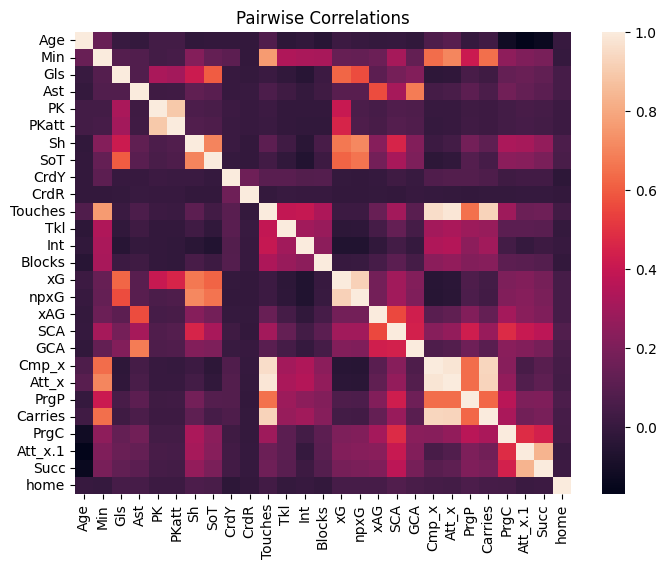

In [71]:
plt.figure(figsize = (8 , 6))
sns.heatmap(player_df_pred.corr(numeric_only = True))
plt.title("Pairwise Correlations")
plt.show()

`xG`, `npxG`, and `SOT` are the features with the highest correlation with the target `Gls` 

### Mutual Information

Mutual information measures the degree of dependency between two random variables, quantifying the amount of information gained about one variable by observing the other

In [72]:
from sklearn.feature_selection import mutual_info_regression
features = player_df_pred.drop(['Gls'], axis=1).select_dtypes(['int' , 'float']) 
target = player_df_pred['Gls']
mi_scores = mutual_info_regression(features, target, random_state=42)
mi_df = pd.DataFrame({'Feature': features.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)
mi_df

,Feature,MI_Score
6,SoT,0.148242
13,xG,0.122627
14,npxG,0.106477
5,Sh,0.071161
22,PrgC,0.023033
16,SCA,0.019531
17,GCA,0.017176
20,PrgP,0.014122
4,PKatt,0.011360
23,Att_x.1,0.008932


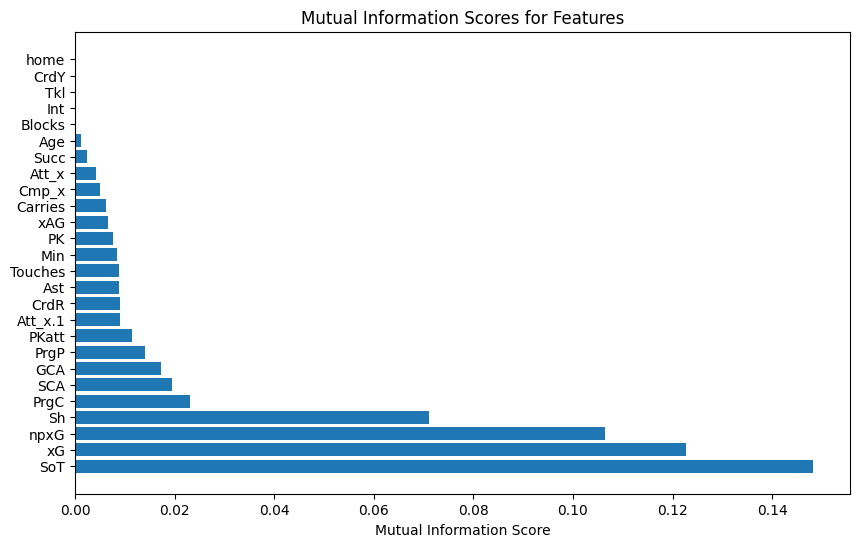

In [73]:
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['MI_Score'])
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information Scores for Features')
plt.show()

We will drop features with zero mutual information because they're uninformative 

In [74]:
player_df_pred = player_df_pred.drop(features.loc[: , mi_scores == 0].columns , axis = 1)
player_df_pred.head()

,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdR,...,GCA,Cmp_x,Att_x,PrgP,Carries,PrgC,Att_x.1,Succ,season,Team
0,FW,29,90,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,12.0,26.0,4.0,13.0,0.0,1.0,1.0,2023-2024,Werder Bremen
1,FW,30,90,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,15.0,22.0,4.0,16.0,1.0,1.0,0.0,2023-2024,Werder Bremen
2,WB,31,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,13.0,21.0,0.0,16.0,1.0,0.0,0.0,2023-2024,Werder Bremen
3,LW,18,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,4.0,0.0,5.0,1.0,1.0,0.0,2023-2024,Werder Bremen
4,WB,29,58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,8.0,16.0,2.0,13.0,1.0,1.0,1.0,2023-2024,Werder Bremen


### Encoding Categorical Features

In [75]:
player_df_pred = pd.get_dummies(player_df_pred, columns=player_df_pred.select_dtypes('object').columns).astype(float)
player_df_pred.head()

,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdR,Touches,...,Team_Köln,Team_Leverkusen,Team_M'Gladbach,Team_Mainz 05,Team_RB Leipzig,Team_Schalke 04,Team_Stuttgart,Team_Union Berlin,Team_Werder Bremen,Team_Wolfsburg
0,29.0,90.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,30.0,90.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,31.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,18.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,29.0,58.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Train Test Split

We will split the data into train, validation, and test sets based on dates in order to simulate real-world scenarios, as it helps assess a model's performance on unseen future data, preventing potential information leakage and providing a more reliable evaluation of its generalization ability over time.

training data will be 2021-2022 season data along with the first quarter of 2022-2023 season, validation data will be from second quartar to third quarter of 2022-2023 season, test data will be last quarter of 2022-2023 season along with data available for 2023-2024 season

In [76]:
train_len = len(player_df_pred[player_df_pred['season_2022-2023'] == 1]) // 4

train = pd.concat([player_df_pred[player_df_pred['season_2021-2022'] == 1],
                   player_df_pred[player_df_pred['season_2022-2023'] == 1][:train_len]])

validation = player_df_pred[player_df_pred['season_2022-2023'] == 1][train_len: 3 * train_len]

test = pd.concat([player_df_pred[player_df_pred['season_2022-2023'] == 1][3 * train_len:]
                  , player_df_pred[player_df_pred['season_2023-2024'] == 1]])

In [77]:
train.shape , validation.shape , test.shape

((11706, 60), (4722, 60), (4345, 60))

In [78]:
X_train , y_train = train.drop('Gls' , axis = 1) , train['Gls']
X_val , y_val = validation.drop('Gls' , axis = 1) , validation['Gls']
X_test , y_test = test.drop('Gls' , axis = 1) , test['Gls']

In [79]:
print("Size of the training data" , X_train.shape[0] , " rows")
print("Size of the validation data" , X_val.shape[0] , " rows")
print("Size of the test data" , X_test.shape[0] , " rows")

Size of the training data 11706  rows
Size of the validation data 4722  rows
Size of the test data 4345  rows


### Feature Scaling

Using `RobustScaler` to scale the data because it scales features using robust statistical measures (median and interquartile range) to reduce the impact of extreme values and improve the robustness of machine learning models.

In [80]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Training a linear regression model

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

In [82]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled , y_train)

LinearRegression()

In [83]:
y_train_pred = linear_regression_model.predict(X_train_scaled)
print("Training root mean squared error" , np.sqrt(mean_squared_error(y_train , y_train_pred)))

Training root mean squared error 0.22950620410644815


### Evaluation on the validation set

In [84]:
y_val_pred = linear_regression_model.predict(X_val_scaled)
print("Validation root mean squared error" , np.sqrt(mean_squared_error(y_val , y_val_pred)))

Validation root mean squared error 0.23169363164679144


The `RMSE` is quite reasonable and close to the training `RMSE`

### Evaluation on the test set

In [85]:
y_test_pred = linear_regression_model.predict(X_test_scaled)
print("test root mean squared error" , np.sqrt(mean_squared_error(y_test , y_test_pred)))

test root mean squared error 23084745303.70263


The model performs so poorly on the test set, maybe it's too simple to learn the patterns in the data. Let's another model

## Training a K-nearest neighbors model

In [86]:
from sklearn.neighbors import KNeighborsRegressor

In [87]:
k_scores = []
for k in range(1 , 15):
    knn_model = KNeighborsRegressor(n_neighbors = k)
    knn_model.fit(X_train_scaled , y_train)
    y_train_pred = knn_model.predict(X_train_scaled)
    y_val_pred = knn_model.predict(X_val_scaled)
    k_scores.append((knn_model , np.sqrt(mean_squared_error(y_val , y_val_pred))))
    print("K = " , k, " Training root mean squared error" , np.sqrt(mean_squared_error(y_train , y_train_pred)) , 
          "Validation root mean squared error" , np.sqrt(mean_squared_error(y_val , y_val_pred)))

K =  1  Training root mean squared error 0.0 Validation root mean squared error 0.3305687986223405
K =  2  Training root mean squared error 0.16565986697360743 Validation root mean squared error 0.2952934491192741
K =  3  Training root mean squared error 0.1932376125687015 Validation root mean squared error 0.27538856731047845
K =  4  Training root mean squared error 0.20647772622396546 Validation root mean squared error 0.26826047163865757
K =  5  Training root mean squared error 0.21281352184352959 Validation root mean squared error 0.26181525118258503
K =  6  Training root mean squared error 0.2167534993152852 Validation root mean squared error 0.2573568118188844
K =  7  Training root mean squared error 0.2200556642642431 Validation root mean squared error 0.2541991472762704
K =  8  Training root mean squared error 0.2236211237132669 Validation root mean squared error 0.25357461369362017
K =  9  Training root mean squared error 0.22529062198797287 Validation root mean squared error 

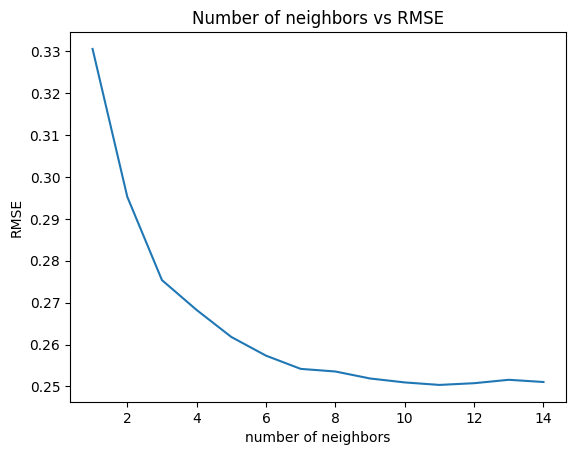

In [88]:
plt.plot(range(1 , 15) , [tup[1] for tup in k_scores])
plt.xlabel("number of neighbors")
plt.ylabel("RMSE")
plt.title("Number of neighbors vs RMSE")
plt.show()

the validation `RMSE` doesn't decrease much starting from k = 6 and it starts to be more stable as k increases. the lowest validation `RMSE` is at k = 11. We will choose this a the k value

In [89]:
knn_model = k_scores[10][0]
knn_model

KNeighborsRegressor(n_neighbors=11)

### Evaluating on test set

In [90]:
y_test_pred = knn_model.predict(X_test_scaled)
print("Test root mean squared error" , np.sqrt(mean_squared_error(y_test , y_test_pred)))

Test root mean squared error 0.26034959089814597


The `RMSE` is close to the train and validation set and it's much better than the linear regression model. This is our best model so far but let's try more models to see if we can do better

## Training a Random Forest model

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [94]:
y_train_pred = rf_model.predict(X_train_scaled)
print("Train root mean squared error" , np.sqrt(mean_squared_error(y_train , y_train_pred)))

Train root mean squared error 0.08689496340975844


### Evaluating on validation set

In [95]:
y_val_pred = rf_model.predict(X_val_scaled)
print("Validation root mean squared error" , np.sqrt(mean_squared_error(y_val , y_val_pred)))

Validation root mean squared error 0.23629185680540396


The  validation `RMSE` is a bit lower than the KNN model, let's check the test `RMSE`

### Evaluating on test set

In [96]:
y_test_pred = rf_model.predict(X_test_scaled)
print("Test root mean squared error" , np.sqrt(mean_squared_error(y_test , y_test_pred)))

Test root mean squared error 0.24604634364707467


## Training xgboost model

In [97]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators = 100 , learning_rate = 0.1 , random_state = 42)

xgb_model.fit(X_train_scaled , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [98]:
y_train_pred = xgb_model.predict(X_train_scaled)
print("Train root mean squared error" , np.sqrt(mean_squared_error(y_train , y_train_pred)))

Train root mean squared error 0.1658428221732195


### Evaluation on the validation set

In [99]:
y_val_pred = xgb_model.predict(X_val_scaled)
print("Validation root mean squared error" , np.sqrt(mean_squared_error(y_val , y_val_pred)))

Validation root mean squared error 0.23479348295255176


### Evaluation on the test set

In [100]:
y_test_pred = xgb_model.predict(X_test_scaled)
print("Test root mean squared error" , np.sqrt(mean_squared_error(y_test , y_test_pred)))

Test root mean squared error 0.24353236626038605


The xgboost model is our best fitted model since it's the one with lowest test `RMSE`.